# Fast Forward Computer Vision

In [1]:
from ffcv.loader import Loader, OrderOption
from ffcv.fields.decoders import NDArrayDecoder, FloatDecoder
from ffcv.transforms import ToTensor
import time
import os
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


# Data Loading

In [2]:
loader = Loader("data/train_data.beton",
                batch_size=48,
                num_workers=8,
                order=OrderOption.RANDOM, #Truely random shuffle
                pipelines = { 
                    "image": [NDArrayDecoder(), ToTensor()],
                    "label": [FloatDecoder(), ToTensor()]
                })

In [3]:
#For time measuring
num_epochs = 20

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in loader:
        pass
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 184.63036274909973 seconds.
Epoch 2 done in 2.602428913116455 seconds.
Epoch 3 done in 1.918853998184204 seconds.
Epoch 4 done in 2.08610200881958 seconds.
Epoch 5 done in 1.9075162410736084 seconds.
Epoch 6 done in 2.0919556617736816 seconds.
Epoch 7 done in 1.9345791339874268 seconds.
Epoch 8 done in 2.1007800102233887 seconds.
Epoch 9 done in 1.908315658569336 seconds.
Epoch 10 done in 2.082359552383423 seconds.
Epoch 11 done in 1.9065866470336914 seconds.
Epoch 12 done in 2.0741357803344727 seconds.
Epoch 13 done in 1.9070029258728027 seconds.
Epoch 14 done in 2.0923402309417725 seconds.
Epoch 15 done in 1.9286158084869385 seconds.
Epoch 16 done in 2.1344683170318604 seconds.
Epoch 17 done in 1.9137725830078125 seconds.
Epoch 18 done in 2.0795645713806152 seconds.
Epoch 19 done in 1.9093132019042969 seconds.
Epoch 20 done in 2.149324417114258 seconds.
Total time taken: 223.36067390441895 seconds
Total time per epoch: 11.168033695220947 seconds


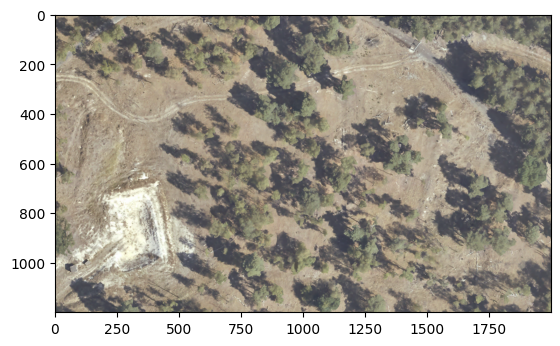

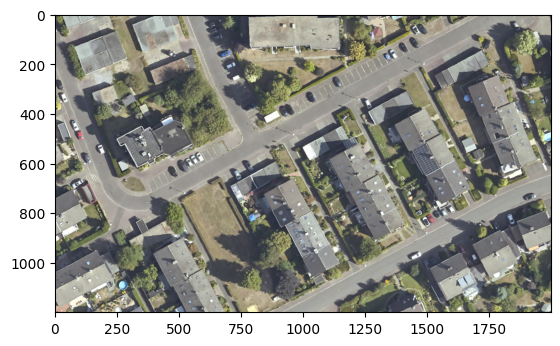

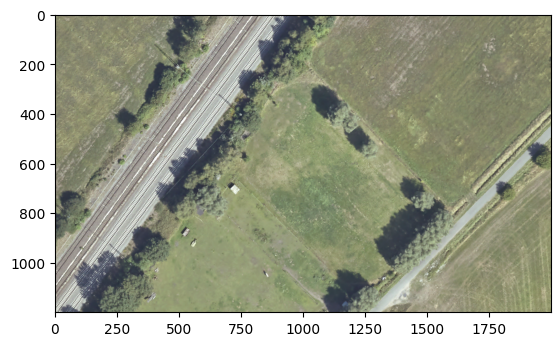

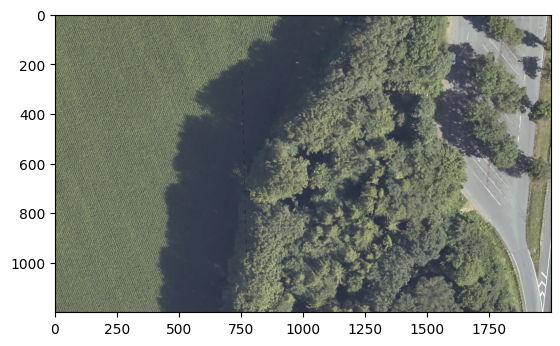

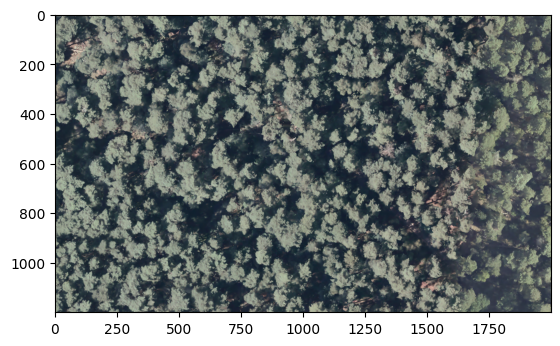

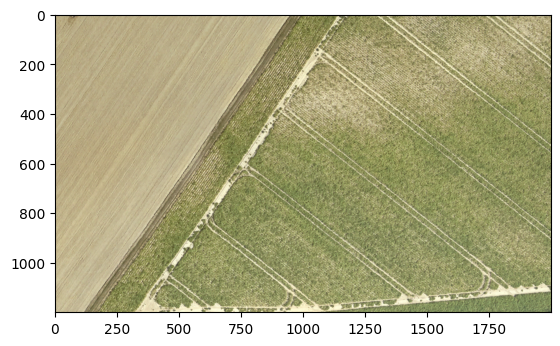

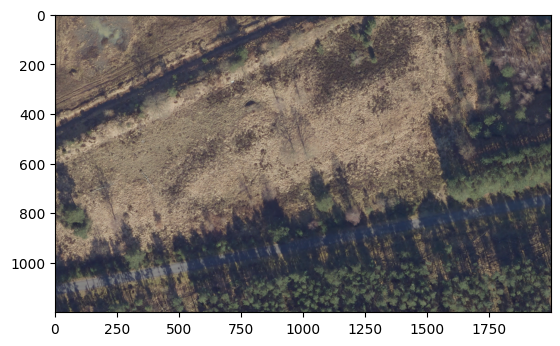

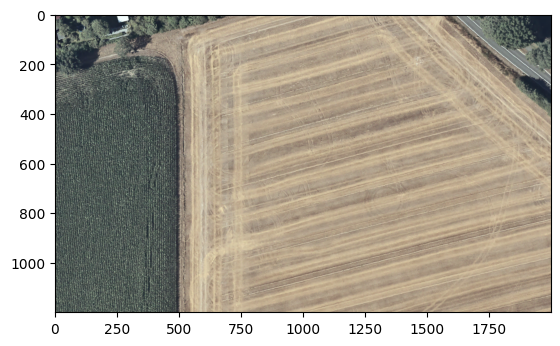

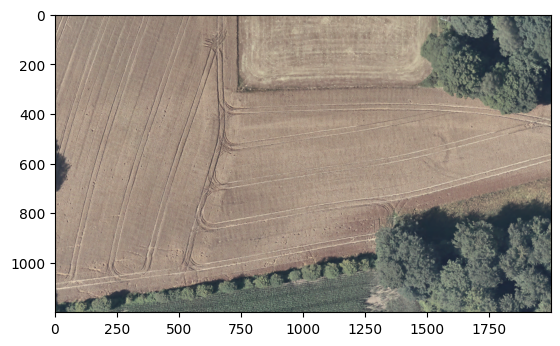

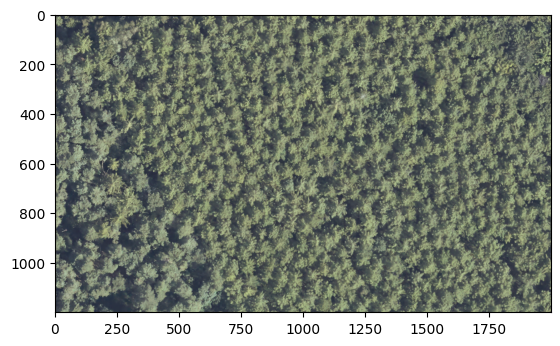

Epoch 1 done.
Total time taken: 4.7964067459106445 seconds
Total time per epoch: 4.7964067459106445 seconds
Iterator i is expected to be 47 and is: 47


In [4]:
#For validation, that Images are indeed loaded
num_epochs = 1
i = 0
start_time = time.time()
for epoch in range(num_epochs):
    for images, labels in loader:
        #Display the first image for the first 10 batches
        if i<10:
            single_image = images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.show()
        i=i+1
        #pass
    print(f"Epoch {epoch+1} done.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")
print("Iterator i is expected to be 47 and is:", i) 

# Data Preprocessing

In [5]:
import torch
from torchvision import transforms

In [7]:
loader_preprocess = Loader("data/train_data.beton",
                batch_size=48,
                num_workers=8,
                order=OrderOption.RANDOM, #Truely random shuffle
                pipelines = { 
                    "image": [
                        NDArrayDecoder(), 
                        ToTensor(),
                        transforms.RandomVerticalFlip(0.5), 
                        transforms.RandomHorizontalFlip(0.5),
                        transforms.RandomRotation(90),
                        transforms.RandomCrop((500, 500)),
                    ],
                    "label": [FloatDecoder(), ToTensor()]
                })

In [8]:
#For time measuring
num_epochs = 5

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in loader_preprocess:
        images = images.float() / 255.0
        pass
        
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 104.1823513507843 seconds.
Epoch 2 done in 108.57615900039673 seconds.
Epoch 3 done in 103.37528848648071 seconds.
Epoch 4 done in 107.7271716594696 seconds.
Epoch 5 done in 107.53739309310913 seconds.
Total time taken: 531.3990080356598 seconds
Total time per epoch: 106.27980160713196 seconds


In [13]:
#For validation
num_epochs = 1
i = 0
start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in loader_preprocess:
        images = images.float() / 255.0
        if i < 12:
            single_image = images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.axis('off')
            plt.savefig(f"visualizations/transform_examples/transform_batch_{i}.png", bbox_inches='tight', pad_inches=0, dpi=500)
            plt.show()
        i=i+1
        
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 113.55191707611084 seconds.
Total time taken: 113.55228590965271 seconds
Total time per epoch: 113.55228590965271 seconds


# Machine Learning

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 125 * 125, 200)
        self.fc2 = nn.Linear(200, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 32 * 125 * 125)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Model()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
#For time measuring
num_epochs = 5

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in loader_preprocess:
        images = images.float() / 255.0
        
        outputs = model(images)
        labels = labels.view(-1, 1).float()
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 212.4775447845459 seconds.
Epoch 2 done in 203.36651134490967 seconds.
Epoch 3 done in 197.4874668121338 seconds.
Epoch 4 done in 189.20230627059937 seconds.
Epoch 5 done in 189.7025921344757 seconds.
Total time taken: 992.2370493412018 seconds
Total time per epoch: 198.44740986824036 seconds


In [12]:
#Depict true and predicted labels for upper left corner
test_images_list = []
true_labels_list = []
labels = np.load("data/train_small_npy/labels.npy", allow_pickle = True).item()

custom_transform = transforms.Compose([
    transforms.Lambda(lambda x: torch.from_numpy(x).float()),
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(90),
    transforms.RandomCrop((500, 500))
])

for i in range(3):
    for j in range(3):
        image = np.load(f"data/train_small_npy/part_{i}_{j}.npy")
        test_images_list.append(image)

        true_label = labels[f"part_{i}_{j}.npy"]
        true_labels_list.append(true_label)

test_images = np.stack(test_images_list)
true_labels = np.stack(true_labels_list)

test_images = torch.stack([custom_transform(image)/255.0 for image in test_images])

with torch.no_grad():
    model.eval()
    outputs = model(test_images)
    model.train()

for i in range(len(test_images)):
    predicted_label = outputs[i].item()
    true_label = true_labels[i].item()

    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

True Label: 32.300029075730365, Predicted Label: 59.3547248840332
True Label: 48.703060020484344, Predicted Label: 58.16794204711914
True Label: 45.16200319928004, Predicted Label: 58.665260314941406
True Label: 43.05451105177395, Predicted Label: 59.47248077392578
True Label: 50.53783853078554, Predicted Label: 59.96974182128906
True Label: 20.70055566802592, Predicted Label: 58.394412994384766
True Label: 22.437885643530564, Predicted Label: 59.461647033691406
True Label: 57.85933785886005, Predicted Label: 59.699737548828125
True Label: 35.674668388114085, Predicted Label: 58.680294036865234
